Exercise 3, Homework6.
The code is copy pasted from the class example.

In [2]:
import scipy.io as sio
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt
Dataset = sio.loadmat('HW6.mat')

train_x = Dataset['train_x']
train_y = Dataset['train_y']
test_x = Dataset['test_x']
test_y = Dataset['test_y']

#(i)
# Estimation of the priori probabilities P(ω_1) and P(ω_2) 
N1 = np.sum(i == 1 for i in train_y)
N2= np.sum(i == 2 for i in train_y)
N = len(train_y)
P1 = N1/N #P(ω_1)
P2 = N2/N #P(ω_2)

#ML estimates of μ1,μ2,Σ1 and Σ2
m1 = np.mean(train_x[0:100,:],0)
m2 = np.mean(train_x[100:200,:],0)

#multivariate normal distribution's covariance matrices 
S1 = 1/N1*((train_x[0:100,:] - 
            np.matlib.repmat(m1,100,1)).T).dot((train_x[0:100,:] - 
                                                     np.matlib.repmat(m1,100,1)))
S2 = 1/N2*((train_x[100:200,:] - 
            np.matlib.repmat(m2,100,1)).T).dot((train_x[100:200,:] - 
                                                     np.matlib.repmat(m2,100,1)))
#(ii)

#Calculate the propabilities of each point to belong on each class.
N_test = len(test_y)
class1 =  multivariate_normal(m1,S1)
I = class1.pdf(test_x)*P1 #I is a N-dim vector which the values: p(x_i/ω_1)*P(ω_1) for all x_is of the training set
class2 =  multivariate_normal(m2,S2)
J = class2.pdf(test_x)*P2 #J is similar to I but for class ω_2 (values of p(x_i/ω_2)*P(ω_2))

#Classify the samples of the test set
Btest_y = np.zeros((N_test,1)) # Create a vector for storing the labels of the samples of the test set

Btest_y[I>J] = 1
Btest_y[I<J] = 2

#(iii)
#Error Estimation
#The percentage of points that have been classified to the wrong class.
Error_Bayes = (np.sum(i==1 for i in Btest_y != test_y))/N_test
print(Error_Bayes)

[ 0.15]


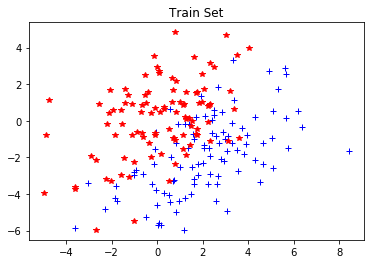

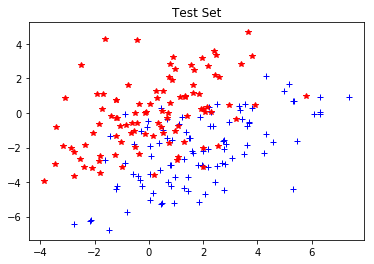

In [8]:
#(b)
#An insight on the training set
plt.plot(train_x[100:200,0],train_x[100:200,1],'b+')
plt.plot(train_x[0:100,0],train_x[0:100,1],'r*')
plt.title('Train Set')
plt.show()
plt.plot(test_x[100:200,0],test_x[100:200,1],'b+')
plt.plot(test_x[0:100,0],test_x[0:100,1],'r*')
plt.title('Test Set')
plt.show()

(C)
We observe that 15% of the test sample have been classified wrongly.
This is reasonable because the 2 multivariate normal distributions overlap, thus there are some points that even if they are more probable to be assigned on one class they actually belong to the other one.
Moreover, the above conclusion is obvious from the plot.